# PREPROCESAMIENTO DE DATOS

- ¿Qué es el preprocesamiento de datos?
    * Es una etapa fundamental en cualquier proyecto de ML o Analisis de Datos.
    * Consiste en transformar, limpiar y preparar los datos en bruto para que sean útiles y mantengan cierta calidad.
    * Su objetivo principal de esta etapa es hacer que los datos sean compatibles con los modelos de ML, eliminar el ruido y
    corregir posibles problemas en los registros.
  
- ¿Por qué es importante?
    * Mantiene a raya los datos sucios
    * Para satisfacer los requerimientos necesarios para aplicar un modelo de ML
  
- ¿Situaciones en las que es necesario?
    * Cuando el dataset tiene muchas entradas o registros incorrectos (inconsistentes)
    * Cuando haya muchos valores falantes, lo que afecta a la integridad del análisis
    * Cuando los datos tienen outliers que distorsionan la interpretación de los resultados
    * Cuando sea necesario transformar variables categóricas en numéricas para que los algoritmos puedan usar el dataset
  

  

# ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)

- ¿Qué es?
  * Es la primera etapa que se realiza despues de cargar el dataset.
  * Su objetivo es obtener una vista general de los datos, explorar sus características y detectar posibles problemas, como valores faltantes o distribuciones extrañas
- ¿Por qué es imporante?
  * Conocer la estructura y naturaleza de los datos
  * Identificar los patrones o relaciones entre las variables
  * Detectar los errores o valores anómalos (outliers)
  * Identificar las variables que son más relevantes para el análisis posterior
- ¿Cuándo debemos hacerlo?
  * Siempre que nosotros recibamos un nuevo conjunto de datos (dataset). Se considera una buena práctica hacerlo antes de aplicar cualquier técnica de modelado, ya que nos permite tomar "decisiones informadas" sobre qué transformaciones necesitamos aplicar a los datos

In [58]:
import pandas as pd
# Cargar el dataset (CSV)
df = pd.read_csv('../Dataset/datos_horarios_contaminacion_lima.csv')
df.head() # Muestra los 5 primeros registros del DataFrame

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO
0,112192,ATE,2010,4,1,0,NaN,NaN,39.8,NaN,NaN,NaN
1,112192,ATE,2010,4,1,1,135.69,NaN,29.9,47.2,NaN,NaN
2,112192,ATE,2010,4,1,2,135.84,NaN,26.5,44.1,NaN,NaN
3,112192,ATE,2010,4,1,3,119.06,NaN,25.9,41.4,NaN,NaN
4,112192,ATE,2010,4,1,4,104.95,NaN,23.3,40.5,NaN,NaN


## RESUMEN ESTADISTICOS DE LOS DATOS

- ¿Qué es un resumen estadístico?
  * Viene a ser un conjunto de medidas que describen las caractéristicas principales de los datos, como la media, mediana, los cuartiles, la desviación estándar, entre otros.
- ¿Por qué es importante?
  * Detectar errores -> En algunas situaciones, los valores máximos o mínimos son muy inusuales, lo que indica posibles errores o outliers.
  * Conocer la dispersión de los datos -> La desviación estándar nos va a indicar que tan dispersos están los datos, lo cual es importante para detectar variables que tienen valores atípicos (no esperados).
  * Conocer la distribución de los datos -> Vamos a poder determinar si los datos siguen una distrubición normal o si están sesgados
- ¿Cuándo debemos utilizarlo?
  * Después de cargar los datos, siempre pero siempre debemos generar un resumen estadístico para detectar las anomalías y tener una idea clara de cómo se distribuyen las variables numéricas

In [59]:
# Vamos a poder conocer los tipos de datos de nuestras columnas
df.dtypes

CODIGO ESTACION      int64
ESTACION            object
ANO                  int64
MES                  int64
DIA                  int64
HORA                 int64
PM 10              float64
PM 2.5             float64
SO2                float64
NO2                float64
O3                 float64
CO                 float64
dtype: object

In [60]:
# Contabilizar la cantidad de filas y columnas en nuestro dataset (DataFrame)
print(df.shape) 

(703056, 12)


In [61]:
print(len(df)) # Cantidad de filas/registros en el dataset

703056


In [62]:
print(df.count()) # Contabilizar los valores no nulos por cada columna

CODIGO ESTACION    703056
ESTACION           703056
ANO                703056
MES                703056
DIA                703056
HORA               703056
PM 10              496684
PM 2.5             339972
SO2                294280
NO2                351254
O3                 348702
CO                 321351
dtype: int64


In [63]:
# Contabilizar la frecuencia de cada valor único en una columna
print(df['ESTACION'].value_counts())

ESTACION
ATE                        92064
SAN BORJA                  90600
CAMPO DE MARTE             89136
SANTA ANITA                81528
VILLA MARIA DEL TRIUNFO    76704
SAN MARTIN DE PORRES       57000
CARABAYLLO                 57000
PUENTE PIEDRA              56784
SAN JUAN DE LURIGANCHO     56640
HUACHIPA                   45600
Name: count, dtype: int64


In [64]:
resumen = df.describe() # Solo incluye columnas numéricas
print(resumen)

       CODIGO ESTACION            ANO            MES            DIA  \
count    703056.000000  703056.000000  703056.000000  703056.000000   
mean     112068.923124    2015.932819       6.517615      15.739763   
std         344.972229       2.653019       3.387901       8.800307   
min      111286.000000    2010.000000       1.000000       1.000000   
25%      112192.000000    2014.000000       4.000000       8.000000   
50%      112194.000000    2016.000000       7.000000      16.000000   
75%      112233.000000    2018.000000       9.000000      23.000000   
max      112267.000000    2020.000000      12.000000      31.000000   

                HORA          PM 10         PM 2.5            SO2  \
count  703056.000000  496684.000000  339972.000000  294280.000000   
mean       11.500000      79.102144      26.354007      12.522626   
std         6.922191      54.458541      17.696484      13.214153   
min         0.000000       5.000000       1.730000       0.100000   
25%         5.7

In [65]:
resumen_all = df.describe(include='all') # Incluye columnas numéricas y categóricas
print(resumen_all)

        CODIGO ESTACION ESTACION            ANO            MES            DIA  \
count     703056.000000   703056  703056.000000  703056.000000  703056.000000   
unique              NaN       10            NaN            NaN            NaN   
top                 NaN      ATE            NaN            NaN            NaN   
freq                NaN    92064            NaN            NaN            NaN   
mean      112068.923124      NaN    2015.932819       6.517615      15.739763   
std          344.972229      NaN       2.653019       3.387901       8.800307   
min       111286.000000      NaN    2010.000000       1.000000       1.000000   
25%       112192.000000      NaN    2014.000000       4.000000       8.000000   
50%       112194.000000      NaN    2016.000000       7.000000      16.000000   
75%       112233.000000      NaN    2018.000000       9.000000      23.000000   
max       112267.000000      NaN    2020.000000      12.000000      31.000000   

                 HORA      

# DETECCIÓN Y MANEJO DE VALORES FALTANTES

- ¿Qué son los valores faltantes?
  * Son aquellos casos en los que no tenemos datos disponibles en ciertas celdas o registros.
  * Se representan comúnmente como NaN (Not a Number) en pandas
- ¿Por qué es importante manejarlos?
  * Porque estos puedes alterar el análisis, ya que muchos algoritmos no los aceptan o los tratan como ceros, lo que puede llevar a conclusiones erróneas
  * Si es que no se tratan correctamente, pueden hacer que un modelo predictivo sea inexacto (de falsos resultados)
- ¿Cuándo debemos hacerlo?
  * Este paso es crucial antes de entrenar cualquier modelo o realizar análisis estadísticos, ya que la presencia de muchos valores nulos puede influir negativamente en los resultados

In [66]:
# isnull() -> Genera un DataFrame del mismo tamaño que el original, donde cada celda contiene True si el valor es nulo (NaN)
#             y False en caso contrario
missing_values = df.isnull()
missing_values.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO
0,False,False,False,False,False,False,True,True,False,True,True,True
1,False,False,False,False,False,False,False,True,False,False,True,True
2,False,False,False,False,False,False,False,True,False,False,True,True
3,False,False,False,False,False,False,False,True,False,False,True,True
4,False,False,False,False,False,False,False,True,False,False,True,True


In [67]:
missing_values = df.isnull().sum()
print(missing_values)

CODIGO ESTACION         0
ESTACION                0
ANO                     0
MES                     0
DIA                     0
HORA                    0
PM 10              206372
PM 2.5             363084
SO2                408776
NO2                351802
O3                 354354
CO                 381705
dtype: int64


# ELIMINACIÓN DE COLUMNAS CON MUCHOS VALORES FALTANTES

- ¿Qué significa eliminar columnas?
  * Si una columna tiene un porcentaje muy alto en valores faltantes, puede que no aporte información útil al análisis y que mantenerla nos genere ruido en los datos. En ese tipo de casos es mejor eliminar la columna
- ¿Por qué es importante?
  * Mantener columnas con demasiados valores falantes puede sesgar los resultados y complicar el análisis posterior. Es mejor enfocarse en las columnas que aporten suficiente información
- ¿Cuándo debemos hacerlo?
  * Cuando una columna tiene más del 50-70% de valores faltantes del total de registros, generalmente no es útil mantenerla en el análisis

In [68]:
# Calculamos el porcentaje de valores faltantes en cada columna
missing_porcentages = df.isnull().mean() * 100
print(missing_porcentages)

CODIGO ESTACION     0.000000
ESTACION            0.000000
ANO                 0.000000
MES                 0.000000
DIA                 0.000000
HORA                0.000000
PM 10              29.353565
PM 2.5             51.643681
SO2                58.142737
NO2                50.038973
O3                 50.401959
CO                 54.292261
dtype: float64


In [69]:
# Definir un umbral de eliminación (58%)
umbral = 58
# columnas_eliminar = missing_porcentages[missing_porcentages>umbral] -> Muestra las columnas que superan el umbral y sus valores
columnas_eliminar = missing_porcentages[missing_porcentages>umbral].index # -> Solo muestra las columnas que superan el umbral
print(columnas_eliminar)

Index(['SO2'], dtype='object')


In [70]:
# Eliminar las columnas que superen el umbral de valores faltantes especificado
data_cleaned_step1 = df.drop(columns=columnas_eliminar)
data_cleaned_step1.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
0,112192,ATE,2010,4,1,0,NaN,NaN,NaN,NaN,NaN
1,112192,ATE,2010,4,1,1,135.69,NaN,47.2,NaN,NaN
2,112192,ATE,2010,4,1,2,135.84,NaN,44.1,NaN,NaN
3,112192,ATE,2010,4,1,3,119.06,NaN,41.4,NaN,NaN
4,112192,ATE,2010,4,1,4,104.95,NaN,40.5,NaN,NaN


In [71]:
missing_values_step1 = data_cleaned_step1.isnull().sum()
print(missing_values_step1)

CODIGO ESTACION         0
ESTACION                0
ANO                     0
MES                     0
DIA                     0
HORA                    0
PM 10              206372
PM 2.5             363084
NO2                351802
O3                 354354
CO                 381705
dtype: int64


# ELIMINACIÓN DE FILAS CON DATOS CRÍTICOS FALTANTES

- ¿Qué son los datos críticos?
  * En un dataset, algunas variables son más importantes que otras. En este caso, los columnas relacionadas con contaminantes (PM10, PM2.5, NO2, O3) se consideran críticas porque son las variables clave del análisis
- ¿Por qué es importante?
  * Si una fila no tiene datos en ninguna de estas columnas críticas, esa fila aporta poco valor al análisis. Por lo tanto, eliminamos las filas que carecen completamente de información en estas columnas
- ¿Cuándo debemos hacerlo?
  * Debemos eliminar las filas cuando no contienen información crítica y los valores faltantes no pueden ser imputados (rellenados) de manera fiable

In [72]:
# Definimos las columnas críticas
columnas_criticas = ['PM 10', 'PM 2.5', 'NO2', 'O3', 'CO']

In [73]:
# Eliminar las filas donde todas las columnas críticas tengan valores faltantes
data_cleaned_step2 = data_cleaned_step1.dropna(subset=columnas_criticas, how='all')
data_cleaned_step2.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
1,112192,ATE,2010,4,1,1,135.69,NaN,47.2,NaN,NaN
2,112192,ATE,2010,4,1,2,135.84,NaN,44.1,NaN,NaN
3,112192,ATE,2010,4,1,3,119.06,NaN,41.4,NaN,NaN
4,112192,ATE,2010,4,1,4,104.95,NaN,40.5,NaN,NaN
5,112192,ATE,2010,4,1,5,84.92,NaN,39.0,NaN,NaN


In [74]:
missing_values_step2 = data_cleaned_step2.isnull().sum()
print(missing_values_step2)

CODIGO ESTACION         0
ESTACION                0
ANO                     0
MES                     0
DIA                     0
HORA                    0
PM 10               88196
PM 2.5             244908
NO2                233626
O3                 236178
CO                 263529
dtype: int64


In [75]:
data_cleaned_step2.shape

(584880, 11)

- ¿Por qué es útil este enfoque?
  * Precisión -> La eliminación de solo las filas que no aportan ninguna información relevante en las columnas mas importantes es necesaria para mantener la integridad del dataset (dataframe) a evaluar
  * Conservación de Datos -> Este enfoque ejecutado es más conservador que eliminar filas de manera indiscrimnada. Estamos solo elimando aquellas columnas que son completamente inútiles para el análisis, y esto ayuda a preservar la mayor cantidad posible de información relevante

# IMPUTACIÓN DE VALORES FALTANTES NUMÉRICOS

- ¿Qué es la imputación de valores faltantes?
  * La imputación es el proceso de sustituir los valores faltantes en un dataset (dataframe) por valores estimados o calculados.
  * Esto se hace con el fin de evitar eliminar filas completas y conservar la mayor cantidad de datos posibles
- ¿Por qué es importante?
  * Muchos algoritmos no pueden manejar valores faltantes, por lo que la imputación es crucial para asegurar que los modelos funcionen correctamente
  * La mediana se utiliza en lugar de la media para la imputación cuando estamos frente a outliers.
  * Se utilizaría la media si trabajaramos con valores atípicos muy altos o bajos, lo cual distorsiona la imputación
- ¿Cuándo debemos aplicarlo?
  * La imputación es apropiada cuando el porcentaje de valores faltantes es moderado (generalmente menos del 50%) y no queremos perder mucha información al eliminar filas o columnas

In [76]:
# Calculamos el porcentaje de valores faltantes en cada columna
missing_porcentages_step3 = data_cleaned_step2.isnull().mean() * 100
print(missing_porcentages_step3)

CODIGO ESTACION     0.000000
ESTACION            0.000000
ANO                 0.000000
MES                 0.000000
DIA                 0.000000
HORA                0.000000
PM 10              15.079333
PM 2.5             41.873205
NO2                39.944262
O3                 40.380591
CO                 45.056935
dtype: float64


In [103]:
# IMPUTACIÓN CON LA MEDIANA
columnas_numericas = ['PM 10', 'PM 2.5', 'NO2', 'O3', 'CO']

In [104]:
# Hacemos una copia del Dataframe para preservar el dataframe del step2
data_cleaned_step3 = data_cleaned_step2.copy()
data_cleaned_step3.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
1,112192,ATE,2010,4,1,1,135.69,NaN,47.2,NaN,NaN
2,112192,ATE,2010,4,1,2,135.84,NaN,44.1,NaN,NaN
3,112192,ATE,2010,4,1,3,119.06,NaN,41.4,NaN,NaN
4,112192,ATE,2010,4,1,4,104.95,NaN,40.5,NaN,NaN
5,112192,ATE,2010,4,1,5,84.92,NaN,39.0,NaN,NaN


In [105]:
print(data_cleaned_step3['O3'].median())

9.7


In [106]:
for column in columnas_numericas:
    data_cleaned_step3[column] = data_cleaned_step3[column].fillna(data_cleaned_step3[column].median())
#   data_cleaned_step3['PM 10'] = data_cleaned_step3['PM 10'].fillna(data_cleaned_step3['PM 10'].median())
#   x = x + x^2

In [107]:
data_cleaned_step3.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
1,112192,ATE,2010,4,1,1,135.69,22.4,47.2,9.7,756.5
2,112192,ATE,2010,4,1,2,135.84,22.4,44.1,9.7,756.5
3,112192,ATE,2010,4,1,3,119.06,22.4,41.4,9.7,756.5
4,112192,ATE,2010,4,1,4,104.95,22.4,40.5,9.7,756.5
5,112192,ATE,2010,4,1,5,84.92,22.4,39.0,9.7,756.5


In [108]:
print(data_cleaned_step3['O3'].median())

9.7


- ¿Qué otras alternativas podríamos utilizar para la imputación?
  * Media: Se usa cuando los datos tienen una distrubición normal (simétrica)
  * Moda: Es útil para imputar variables categóricas
  * Imputación basa en modelos: Se puede utilizar KNN (K-Nearest Neighbors) o regresión para imputar valores, donde los valores se predicen en función de otras variables

In [109]:
data_cleaned_step3.describe()

,CODIGO ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
count,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000
mean,112080.348622,2015.740885,6.592260,15.760387,11.507017,77.241031,24.698338,26.040920,12.961908,824.894452
std,334.381847,2.589568,3.365054,8.795113,6.922851,50.378821,13.632247,14.270052,12.315836,466.729333
min,111286.000000,2010.000000,1.000000,1.000000,0.000000,5.000000,1.730000,0.000000,0.000000,0.100000
25%,112192.000000,2014.000000,4.000000,8.000000,6.000000,44.990000,20.000000,20.700000,7.400000,695.800000
50%,112194.000000,2016.000000,7.000000,16.000000,12.000000,66.760000,22.400000,24.000000,9.700000,756.500000
75%,112233.000000,2018.000000,9.000000,23.000000,18.000000,95.100000,24.900000,27.500000,12.500000,816.500000
max,112267.000000,2020.000000,12.000000,31.000000,23.000000,1442.420000,786.900000,231.200000,165.800000,5917.300000


In [110]:
data_cleaned_step3.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
1,112192,ATE,2010,4,1,1,135.69,22.4,47.2,9.7,756.5
2,112192,ATE,2010,4,1,2,135.84,22.4,44.1,9.7,756.5
3,112192,ATE,2010,4,1,3,119.06,22.4,41.4,9.7,756.5
4,112192,ATE,2010,4,1,4,104.95,22.4,40.5,9.7,756.5
5,112192,ATE,2010,4,1,5,84.92,22.4,39.0,9.7,756.5


In [111]:
missing_values_step3 = data_cleaned_step3.isnull().sum()
print(missing_values_step3)

CODIGO ESTACION    0
ESTACION           0
ANO                0
MES                0
DIA                0
HORA               0
PM 10              0
PM 2.5             0
NO2                0
O3                 0
CO                 0
dtype: int64


In [112]:
# Valores mas altos de PM 2.5
print(data_cleaned_step3['PM 2.5'].sort_values(ascending=False).head(10))

67969     786.9
508177    720.7
508178    714.8
67970     569.2
508179    558.0
329235    535.2
508180    501.9
67971     465.6
67972     460.3
678962    455.6
Name: PM 2.5, dtype: float64


In [113]:
# Valores mas altos de PM CO
print(data_cleaned_step3['CO'].sort_values(ascending=False).head(10))

53262     5917.3
54555     5902.3
54382     5840.8
54554     5631.0
54383     5425.4
54549     5365.3
54553     5297.7
53263     5277.2
54556     5262.3
520111    5225.6
Name: CO, dtype: float64


In [114]:
columnas_numericas = ['PM 2.5', 'CO']

# TRATAMIENTO DE OUTLIERS (Valores Atípicos)

- ¿Qué son los Outliers?
  * Son valores que son significativamente diferentes en la mayoría de datos. Puedebn deberse a errores de medición, entradas incorrectas o ser casos excepcionales que no representan la tendencia general del dataset
- ¿Por qué es importante tratarlos?
  * Estos valores pueden distorsionar los resultados de los modelos predictivos, especialmente si afectan nuestra medición como la media o la desviación estándar
- ¿Cuándo debemos hacerlo?
  * Es importante tratarlos antes de aplicar cualquier modelo estadístico o de machine learning que dependa de la suposición de normalidad o de una distribución estándar

# CUARTILES

- ¿Qué son los cuartiles?
  * Los cuartiles dividen un conjunto de datos ordenados en cuatro partes iguales
  * Cada cuartil contiene un 25% de todos los datos, y los límiites entre los cuartiles son valores especificos que nos ayudarán a entender como se distribuyen los datos
    * Primer Quartil (Q1)  -> Es el valor por debajo del cual se encuentra el 25% de los datos. También se le denomina o se le conoce como el percentil 25. Es decir, el 25% de los datos son menos o iguales a este valor
    * Segundo Quartil (Q2) -> También lo vamos a conocer como la mediana. Es el valor que divide el dataset a la mitad, de manera que el 50% de los datos son menos o iguales a este valor
    * Tercer Quartil (Q3)  -> Es el valor por debajo del cual se encuentra el 75% de los datos. Es decir, el 75% de los datos son menos o iguales a este valor

- ¿Cuál es la importancia de los cuartiles?
  * Su importancia radica en la medición de la dispersión y distribución de los datos sin depender de la media, que puede ser distorsionada por los outliers
  * Al calcular los cuartiles, podemos evaluar la variabilidad de los datos y detectar los outliers

#  RANGO INTERCUARTÍLICO (IQR)


  * Es de las medidas más útiles derivadas de los cuartiles
  * Viene a ser la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1)
  * IQR = Q3 - Q1
  * IQR: El rango que mide la dispersión central de los datos. En otras palabras, nos dice qué tan dispersos están los datos entre el 25% y el 75%.
  * Esta es una medida robusta frente a los outliers

- ¿Por qué es imporntate el IQR en el tratamiento de outliers?
  * Es la técnica por excelencia para calcular outliers. Los valores que están por muy encima o por muy debajo del IQR se consideran outliers.
  * Los datos dentro del IQR representan la "zona segura" de valores en la que se encuentra la mayoría de observaciones

- Para detectar Outliers, utilizamos la regla de los 1.5 * IQR
  * Limite inferior
    * Se define como Q1 - (1.5 * IQR) -> Cualquier valor por debajo de este límite se considera un outlier
  * Limite superior
    * Se define como Q3 + (1.5 * IQR) -> Cualquier valor por encima de este límite se considera un outlier
  * Estos límites definen un rango esperado de los valores, y cualquier valor que se salga de estos limites es un candidato a ser considerado un outlier

In [115]:
def treat_outliters(df, column):

    # Definimos los cuartiles
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definimos los límites inferior y superior
    
    lim_inferior = Q1 - 1.5 * IQR
    lim_superior = Q3 + 1.5 * IQR
    
    # Capeamos los valores fuera del rango
    
    df[column] = df[column].apply(lambda x: min(max(x, lim_inferior), lim_superior))
    
    return df


# Aplicamos el tratamiento a las columnas numéricas
for column in columnas_numericas:
    data_cleaned_step4 = treat_outliters(data_cleaned_step3, column)

In [116]:
data_cleaned_step4.describe()

,CODIGO ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
count,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000,584880.000000
mean,112080.348622,2015.740885,6.592260,15.760387,11.507017,77.241031,22.575385,26.040920,12.961908,757.335137
std,334.381847,2.589568,3.365054,8.795113,6.922851,50.378821,5.938326,14.270052,12.315836,156.296833
min,111286.000000,2010.000000,1.000000,1.000000,0.000000,5.000000,12.650000,0.000000,0.000000,514.750000
25%,112192.000000,2014.000000,4.000000,8.000000,6.000000,44.990000,20.000000,20.700000,7.400000,695.800000
50%,112194.000000,2016.000000,7.000000,16.000000,12.000000,66.760000,22.400000,24.000000,9.700000,756.500000
75%,112233.000000,2018.000000,9.000000,23.000000,18.000000,95.100000,24.900000,27.500000,12.500000,816.500000
max,112267.000000,2020.000000,12.000000,31.000000,23.000000,1442.420000,32.250000,231.200000,165.800000,997.550000


In [117]:
missing_values_step4 = data_cleaned_step4.isnull().sum()
print(missing_values_step4)

CODIGO ESTACION    0
ESTACION           0
ANO                0
MES                0
DIA                0
HORA               0
PM 10              0
PM 2.5             0
NO2                0
O3                 0
CO                 0
dtype: int64


In [118]:
# Valores mas altos de PM 2.5
print(data_cleaned_step4['PM 2.5'].sort_values(ascending=False).head(10))

694835    32.25
71195     32.25
71193     32.25
71192     32.25
71191     32.25
71190     32.25
71189     32.25
71188     32.25
71187     32.25
71186     32.25
Name: PM 2.5, dtype: float64


In [119]:
print(data_cleaned_step4['PM 2.5'].mean())

22.575385276146392


In [120]:
# Valores mas altos de PM CO
print(data_cleaned_step4['CO'].sort_values(ascending=False).head(10))

398086    997.55
347891    997.55
347904    997.55
347903    997.55
347902    997.55
347901    997.55
347900    997.55
347899    997.55
347898    997.55
347897    997.55
Name: CO, dtype: float64


In [121]:
print(data_cleaned_step4['CO'].mean())

757.3351365237314


# Conversión de datos categóricos a Números

- ¿Qué es la conversión de variables categóricas?
  * Es la transformación del tipo de datos categoricos u object a tipo int o float
- ¿Por qué es imporntate?
  * Algunos algortimos de machine learning no pueden trabajar directamente con datos categóritocs (como nombres de estaciones, ciudades, departamentos, etc), ya que esperan que todos los valores sean numéricos. Por eso es necesario realizar la conversión en números
  * Es importante que la conversión preserve la estrcutura de los datos sin introducir sesgos no deseados
- ¿Cuándo debemos hacerlo?
  * Siempre que tengamos variables categóritcas y vayamos a aplicar modelos que solo acepten variables numéricas


In [122]:
data_cleaned_step4.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO
1,112192,ATE,2010,4,1,1,135.69,22.4,47.2,9.7,756.5
2,112192,ATE,2010,4,1,2,135.84,22.4,44.1,9.7,756.5
3,112192,ATE,2010,4,1,3,119.06,22.4,41.4,9.7,756.5
4,112192,ATE,2010,4,1,4,104.95,22.4,40.5,9.7,756.5
5,112192,ATE,2010,4,1,5,84.92,22.4,39.0,9.7,756.5


In [123]:
print(data_cleaned_step4.shape)

(584880, 11)


In [133]:
data_cleaned_step4.dtypes

CODIGO ESTACION      int64
ESTACION            object
ANO                  int64
MES                  int64
DIA                  int64
HORA                 int64
PM 10              float64
PM 2.5             float64
NO2                float64
O3                 float64
CO                 float64
dtype: object

In [134]:
data_cleaned_step4['ESTACION'] = data_cleaned_step4['ESTACION'].astype('category')

In [135]:
data_cleaned_step4.dtypes

CODIGO ESTACION       int64
ESTACION           category
ANO                   int64
MES                   int64
DIA                   int64
HORA                  int64
PM 10               float64
PM 2.5              float64
NO2                 float64
O3                  float64
CO                  float64
dtype: object

In [136]:
data_cleaned_step4['ESTACION_NUM'] = data_cleaned_step4['ESTACION'].cat.codes

In [138]:
data_cleaned_step4.dtypes

CODIGO ESTACION       int64
ESTACION           category
ANO                   int64
MES                   int64
DIA                   int64
HORA                  int64
PM 10               float64
PM 2.5              float64
NO2                 float64
O3                  float64
CO                  float64
ESTACION_NUM           int8
dtype: object

In [144]:
data_cleaned_step4['ESTACION'].sort_values(ascending=False)


410565    VILLA MARIA DEL TRIUNFO
361332    VILLA MARIA DEL TRIUNFO
361343    VILLA MARIA DEL TRIUNFO
361342    VILLA MARIA DEL TRIUNFO
361341    VILLA MARIA DEL TRIUNFO
                   ...           
55412                         ATE
55411                         ATE
55410                         ATE
55409                         ATE
1                             ATE
Name: ESTACION, Length: 584880, dtype: category
Categories (10, object): ['ATE', 'CAMPO DE MARTE', 'CARABAYLLO', 'HUACHIPA', ..., 'SAN JUAN DE LURIGANCHO', 'SAN MARTIN DE PORRES', 'SANTA ANITA', 'VILLA MARIA DEL TRIUNFO']

In [145]:
data_cleaned_step4['ESTACION_NUM'].sort_values(ascending=False)

410565    9
361332    9
361343    9
361342    9
361341    9
         ..
55412     0
55411     0
55410     0
55409     0
1         0
Name: ESTACION_NUM, Length: 584880, dtype: int8

In [146]:
data_cleaned_step4.head()

,CODIGO ESTACION,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,NO2,O3,CO,ESTACION_NUM
1,112192,ATE,2010,4,1,1,135.69,22.4,47.2,9.7,756.5,0
2,112192,ATE,2010,4,1,2,135.84,22.4,44.1,9.7,756.5,0
3,112192,ATE,2010,4,1,3,119.06,22.4,41.4,9.7,756.5,0
4,112192,ATE,2010,4,1,4,104.95,22.4,40.5,9.7,756.5,0
5,112192,ATE,2010,4,1,5,84.92,22.4,39.0,9.7,756.5,0


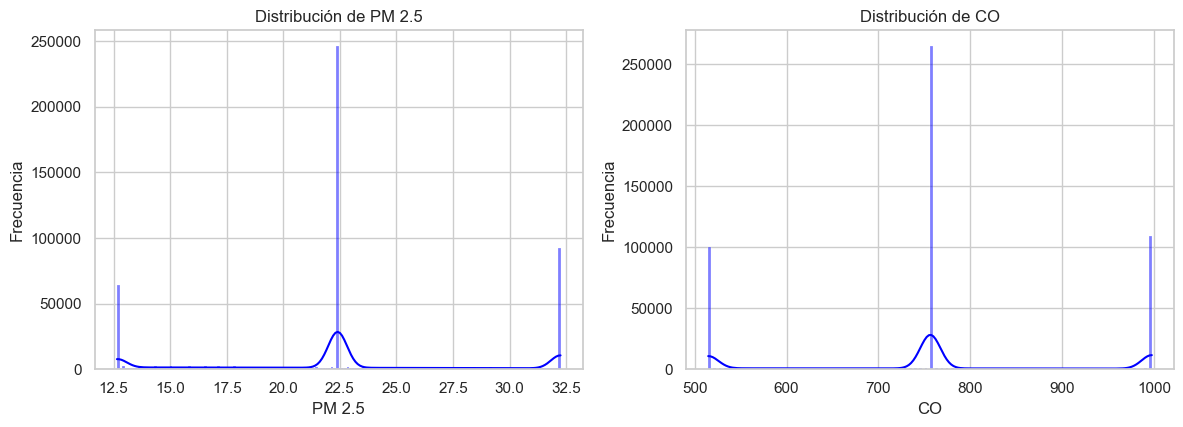

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
for i, column in enumerate(columnas_numericas, 1):
    plt.subplot(2,2,i)
    sns.histplot(data_cleaned_step4[column], kde = True, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [149]:
output = '../Dataset/datos_horarios_contaminacion_lima_procesados.csv'
data_cleaned_step4.to_csv(output, index=False)